In [1]:
import numpy as np
np.random.seed(42)
np.set_printoptions(suppress=True)
from scipy.optimize import least_squares, curve_fit
from matplotlib import pylab as plt
import pandas as pd
import glob
import time
from tqdm.notebook import tqdm
import os
import random

import warnings
from scipy.optimize import OptimizeWarning
warnings.simplefilter("error", OptimizeWarning)

# import seaborn as sns
# sns.set()

In [75]:
def plot_allbands_df(df,title=None,ax=plt):
    ugrizYcolors = ["violet","green","red","darkred","grey","black"]
    for i,band in enumerate("ugrizY"):
        subdf = df[df["band"]==band].reset_index(drop=True)
        x = subdf["mjd"]
        y = subdf["flux"]
        yerr = subdf["fluxerr"]
#         ax.errorbar(x,y,yerr=yerr,ls = "None",color=ugrizYcolors[i])
        ax.scatter(x,y,s=5,label=band,color=ugrizYcolors[i])
        if title is not None:
            if ax is not plt:
                ax.set_title(title)
            else:
                ax.title(title)
    return ax

In [3]:
filels = glob.glob("csv_data/*.csv")

In [4]:
# df = pd.read_csv("csv_data/122615_TDE.csv")

In [5]:
def give_detected_info(file,mismatchdict={},plot=False,print_errratiolessthan5=False,print_mismatchcount=False,
                      print_imaxmjdmax=False):
    title=file.split("/")[-1]
    title_class = title.split("_")[-1].split(".")[0]
    if title_class not in mismatchdict.keys():
        mismatchdict[title_class] = 0
    
    df = pd.read_csv(file)
    df["mjd"] = df["mjd"] - df["mjd"][0]
    imax = abs(df["flux"]/df["fluxerr"]).argmax()
    
    if print_errratiolessthan5 and abs(df["flux"]/df["fluxerr"]).max() < 5:
        print(title)
    
    mjdmax = df["mjd"][imax]
    if print_imaxmjdmax:
        print(f"imax = {imax}\nmjdmax={mjdmax}")
    df["sid_bool"]=0
    df.loc[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+120),"sid_bool"] = 1
    mismatch_count = len(df.loc[df["detected_bool"] - df["sid_bool"] == 1])

    if mismatch_count > 0:
        mismatchdict[title_class] = mismatchdict[title_class] + 1
        if print_mismatchcount:
            print(f"Mismatch Count = {mismatch_count} for {file.split('/')[-1]}")
    
    if plot:
        subdf = df[df["sid_bool"] == 1].reset_index(drop=True)
        f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
        x = df["mjd"]
        y = df["flux"]
        ax1.scatter(x,y,s=1.2)
        plot_allbands_df(subdf,ax=ax2,title=title)

        plt.suptitle(file.split("/")[-1])
        plt.show()
    return mismatchdict

In [6]:
mismatchdict={}
for file in filels:
    mismatchdict = give_detected_info(file,mismatchdict,print_mismatchcount=True)
#     mismatchdict = give_detected_info(file,mismatchdict,print_errratiolessthan5=True)    

Mismatch Count = 62 for 227152_AGN.csv
Mismatch Count = 1 for 69795_AGN.csv
Mismatch Count = 75 for 272103_AGN.csv
Mismatch Count = 68 for 204227_AGN.csv
Mismatch Count = 1 for 299008_TDE.csv
Mismatch Count = 39 for 220372_AGN.csv
Mismatch Count = 1 for 221529_SLSN-I.csv
Mismatch Count = 111 for 281587_AGN.csv
Mismatch Count = 116 for 75803_AGN.csv
Mismatch Count = 177 for 198396_AGN.csv
Mismatch Count = 7 for 267239_AGN.csv
Mismatch Count = 131 for 91871_AGN.csv
Mismatch Count = 2 for 276084_SLSN-I.csv
Mismatch Count = 59 for 315884_AGN.csv
Mismatch Count = 44 for 94074_AGN.csv
Mismatch Count = 35 for 287551_AGN.csv
Mismatch Count = 7 for 321618_AGN.csv
Mismatch Count = 121 for 231183_AGN.csv
Mismatch Count = 41 for 222829_AGN.csv
Mismatch Count = 1 for 318874_SLSN-I.csv
Mismatch Count = 39 for 266706_AGN.csv
Mismatch Count = 10 for 239384_AGN.csv
Mismatch Count = 46 for 175848_AGN.csv
Mismatch Count = 14 for 317857_AGN.csv
Mismatch Count = 3 for 53377_SLSN-I.csv
Mismatch Count = 40 f

In [7]:
mismatchdict

{'SNIa-91bg': 0,
 'TDE': 5,
 'SNII': 0,
 'SNIbc': 0,
 'SNIa': 1,
 'SLSN-I': 9,
 'SNIax': 0,
 'AGN': 59}

## New

In [8]:
print("ratio3bool")
print("Heuristic Criteria is at least 3 observations within 5 days having flux-fluxerr ratio > 2")

print("mjdstart = v.mjd.values[0]")
print("Range: mjdstart - 100 to mjdstart + 100")

ratio3bool
Heuristic Criteria is at least 3 observations within 5 days having flux-fluxerr ratio > 2
mjdstart = v.mjd.values[0]
Range: mjdstart - 85 to mjdstart + 25


In [52]:
df

,mjd,band,flux,fluxerr,detected_bool,ratio,ratio2bool
0,0.0000,u,-0.077583,2.732805,0,0.028390,0
1,0.9127,u,0.079472,2.414393,0,0.032916,0
2,1.9150,u,-2.951252,2.438854,0,1.210098,0
3,2.9081,u,-5.502644,2.785080,0,1.975758,0
4,3.9089,u,-3.212003,3.202566,0,1.002947,0
...,...,...,...,...,...,...,...
250,851.6723,i,-0.424188,1.283293,0,0.330546,0
251,851.6833,z,1.133317,1.964738,0,0.576829,0
252,851.6942,Y,-1.031761,4.901828,0,0.210485,0
253,853.6575,u,0.655737,2.508223,0,0.261435,0


In [89]:
subdf_ratio2["mjd"].diff()

7           NaN
19       6.0672
81     353.0381
101     28.8194
126     39.9442
159     55.8805
161      0.0152
162      0.0110
164      4.9718
166      0.0152
167      0.0109
175    253.1801
196     28.9279
249     74.8771
Name: mjd, dtype: float64

In [88]:
for k, v in subdf_ratio2[subdf_ratio2["mjd"].diff()<3].groupby((subdf_ratio2["mjd"].diff()>=3).cumsum()):
    print("Group",k)
    print(v,"\n")

Group 5
          mjd band       flux   fluxerr  detected_bool     ratio
161  489.6707    i  11.404893  2.051769              1  5.558566
162  489.6817    z  10.704266  2.395172              0  4.469101 

Group 6
          mjd band      flux   fluxerr  detected_bool     ratio
166  494.6687    i  5.470729  1.147357              0  4.768114
167  494.6796    z  9.996272  1.821012              1  5.489405 



In [76]:
def give_detected_info2(file,mismatchdict={},plot=False,print_mismatchcount=False,
                      print_mjdmax=False):
    title=file.split("/")[-1]
    title_class = title.split("_")[-1].split(".")[0]
    if title_class not in mismatchdict.keys():
        mismatchdict[title_class] = 0
    
    df = pd.read_csv(file)
    df["mjd"] = df["mjd"] - df["mjd"][0]
    df["ratio"] = abs(df["flux"]/df["fluxerr"])
        
    subdf_detected = df[df["detected_bool"]==1]
    subdf_ratio2 = df[df["ratio"]>=2]
    
    
    df["ratio2bool"] = 0
    # https://towardsdatascience.com/pandas-dataframe-group-by-consecutive-certain-values-a6ed8e5d8cc

    for k, v in subdf_ratio2[subdf_ratio2["mjd"].diff()<3].groupby((subdf_ratio2["mjd"].diff()>=3).cumsum()):
        if len(v)>=3:
            mjdstart = v.mjd.values[0]
            break
    try:
        mjdstart
    except:
        mjdstart = 0
    df.loc[(df["mjd"] >= mjdstart-100) & (df["mjd"] <= mjdstart+100),"ratio2bool"] = 1
    
    mjdmax = mjdstart
    
    if print_mjdmax:
        print(f"mjdmax={mjdmax}")
    mismatch_count = len(df.loc[df["detected_bool"] - df["ratio2bool"] == 1])

    if mismatch_count > 0:
        mismatchdict[title_class] = mismatchdict[title_class] + 1
        if print_mismatchcount:
            print(f"Mismatch Count = {mismatch_count} for {file.split('/')[-1]}")
    
    if plot:
        subdf = df[df["ratio2bool"] == 1].reset_index(drop=True)
        f, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(12,4))
#         x = df["mjd"]
#         y = df["flux"]
#         ax1.scatter(x,y,s=1.2)
        subdf2 = df[df["detected_bool"] == 1].reset_index(drop=True)
        plot_allbands_df(subdf2,ax=ax1,title=title+"_detectedbool")
        plot_allbands_df(subdf,ax=ax2,title=title+"_ratio2bool")

        plt.suptitle(file.split("/")[-1])
        plt.show()
    return mismatchdict

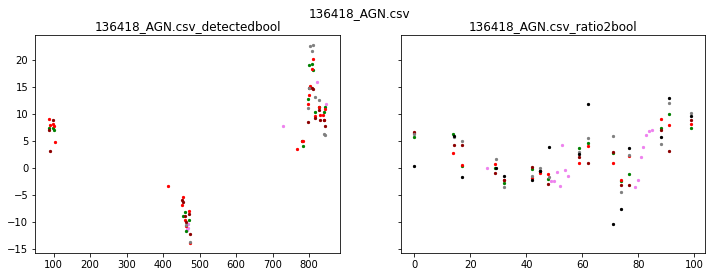

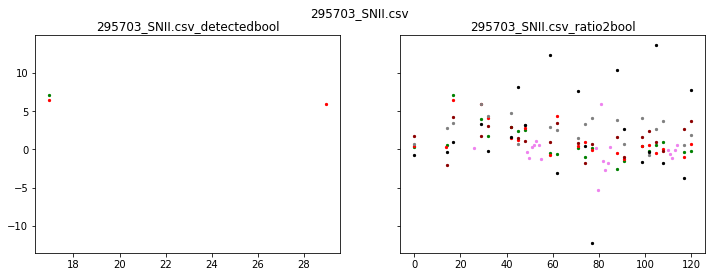

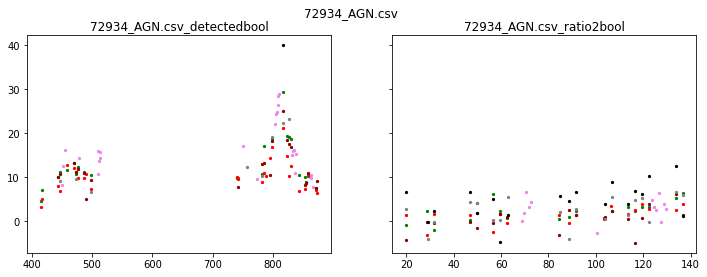

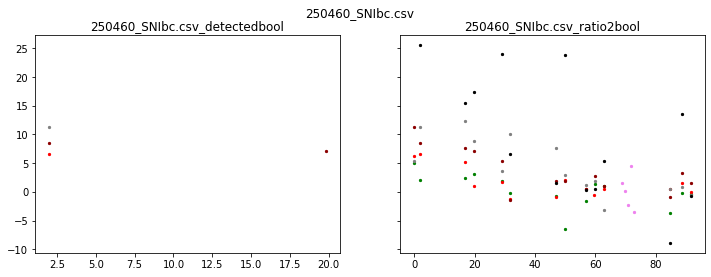

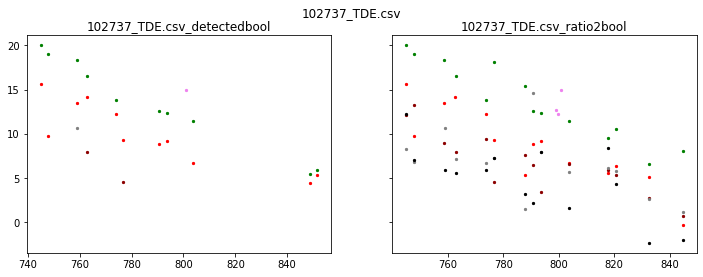

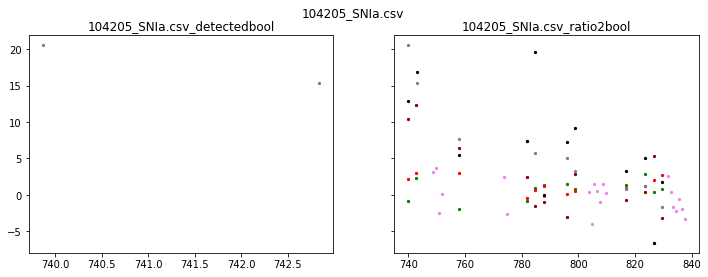

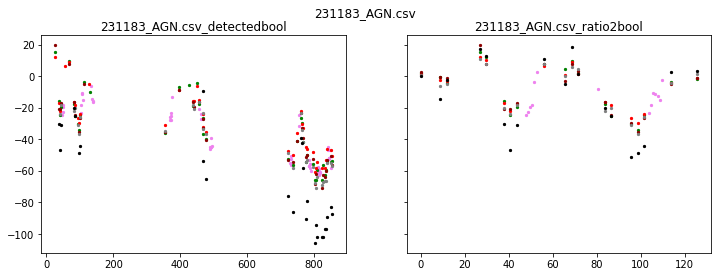

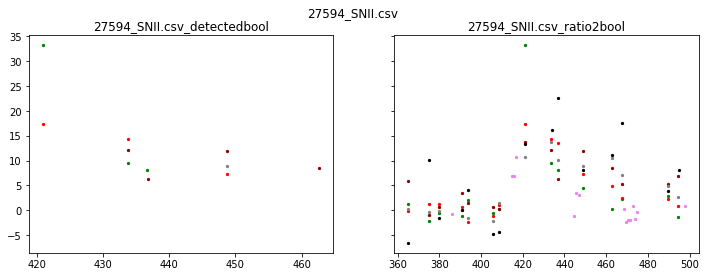

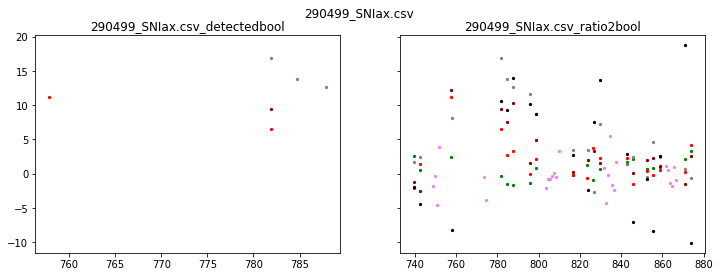

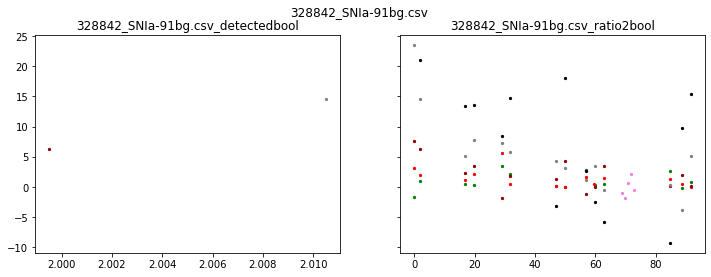

In [77]:
mismatchdict={}
# for file in tqdm(filels):
for file in random.sample(filels,10):
    mismatchdict = give_detected_info2(file,mismatchdict,plot=True)

In [78]:
mismatchdict

{'AGN': 3,
 'SNII': 0,
 'SNIbc': 0,
 'TDE': 1,
 'SNIa': 0,
 'SNIax': 0,
 'SNIa-91bg': 0}

In [200]:
# for file in random.sample(filels,5):
#     fname = file.split("/")[-1]
#     df = pd.read_csv(file)
#     df["mjd"] = df["mjd"] - df["mjd"][0]
#     df["ratio"] = abs(df["flux"]/df["fluxerr"])

#     imax = abs(df["flux"]/df["fluxerr"]).argmax()
    
    
#     mjdmax = df["mjd"][imax]
#     df["sid_bool"]=0
#     df.loc[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+120),"sid_bool"] = 1

#     subdf_detected = df[df["detected_bool"]==1]
#     subdf_ratio2 = df[df["ratio"]>=2]
#     subdf_sidbool = df[df["sid_bool"]==1]
    
    
#     df["ratio3bool"] = 0
#     # https://towardsdatascience.com/pandas-dataframe-group-by-consecutive-certain-values-a6ed8e5d8cc

#     for k, v in subdf_ratio2[subdf_ratio2["mjd"].diff()<3].groupby((subdf_ratio2["mjd"].diff()>=3).cumsum()):
#         if len(v)<3:
#             continue
#         mjdstart = v.mjd.values[0]
#         break
#     df.loc[(df["mjd"] >= mjdstart-100) & (df["mjd"] <= mjdstart+100),"ratio3bool"] = 1

#     break

In [203]:
print(f"fname={fname}")
print(f"SIDBOOL: mjdmax={mjdmax}, imax={imax}")
print(f"RATBOOL: mjdstart={mjdstart}")

fname=183631_AGN.csv
SIDBOOL: mjdmax=40.769500000002154, imax=31
RATBOOL: mjdstart=0.0078000000066822395


In [105]:
df = pd.read_csv("csv_data/39345_SNII.csv")
df["ratio"] = abs(df["flux"]/df["fluxerr"])

In [106]:
subdf_detected = df[df["detected_bool"]==1]
subdf_ratio3 = df[df["ratio"]>=3]

In [107]:
subdf_detected[subdf_detected["ratio"]<3]

,mjd,band,flux,fluxerr,detected_bool,ratio
188,60345.1713,z,5.420258,2.267127,1,2.390805
193,60356.2298,z,6.003763,2.327676,1,2.579295


In [108]:
subdf_detected

,mjd,band,flux,fluxerr,detected_bool,ratio
170,60327.3158,r,6.380403,1.371239,1,4.653020
188,60345.1713,z,5.420258,2.267127,1,2.390805
193,60356.2298,z,6.003763,2.327676,1,2.579295
197,60359.1234,i,6.227373,1.863008,1,3.342644


In [109]:
subdf_ratio3

,mjd,band,flux,fluxerr,detected_bool,ratio
64,59688.0123,i,-7.819399,2.423834,0,3.226046
170,60327.3158,r,6.380403,1.371239,1,4.653020
172,60327.3310,i,7.365368,2.207418,0,3.336644
173,60327.3420,z,11.199477,3.413306,0,3.281123
177,60330.2032,i,10.148780,2.777265,0,3.654235
178,60330.2141,z,10.284228,3.418394,0,3.008497
182,60341.1805,i,7.772909,1.796105,0,4.327647
183,60341.1914,z,7.931674,2.234226,0,3.550077
185,60345.1451,r,3.788362,1.024136,0,3.699081
187,60345.1604,i,6.602319,1.548473,0,4.263761


# Debug

In [28]:
df=pd.read_csv("csv_data/75803_AGN.csv")
df["mjd"] = df["mjd"] - df["mjd"][0]
imax = abs(df["flux"]/df["fluxerr"]).argmax()

if abs(df["flux"]/df["fluxerr"]).max() < 5:
    print(title)

mjdmax = df["mjd"][imax]

print(f"imax = {imax}\nmjdmax={mjdmax}")
df["sid_bool"]=0
df.loc[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+120),"sid_bool"] = 1
df["ratio"] = abs(df["flux"]/df["fluxerr"])
mismatch_count = len(df.loc[df["detected_bool"] - df["sid_bool"] == 1])
print(f"Mismatch Count = {mismatch_count}")

imax = 322
mjdmax=852.6057000000001
Mismatch Count = 116


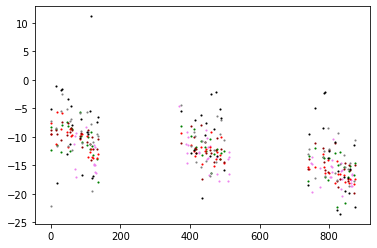

In [27]:
plot_allbands_df(df).show()

<module 'matplotlib.pylab' from '/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/matplotlib/pylab.py'>

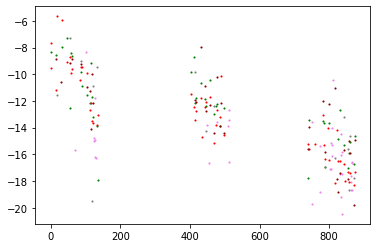

In [28]:
plot_allbands_df(df[df["detected_bool"]==1])

<module 'matplotlib.pylab' from '/home/sidchaini/resspect_work/.venvs/newresspect/lib/python3.8/site-packages/matplotlib/pylab.py'>

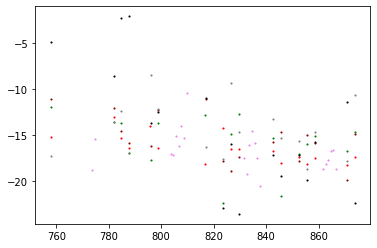

In [29]:
plot_allbands_df(df[df["sid_bool"]==1])

In [30]:
101.6623 - 0.0078

101.6545

In [41]:
df[df["sid_bool"]==1]["ratio"].mean()

8.28073804737199

In [35]:
df[df["detected_bool"]==1]

,mjd,band,flux,fluxerr,detected_bool,sid_bool,ratio
0,0.0000,r,-7.660913,1.512587,1,0,5.064775
4,1.9841,r,-9.527588,1.073902,1,0,8.871934
5,1.9918,g,-8.355110,1.120871,1,0,7.454123
9,16.8739,r,-11.183630,0.891959,1,0,12.538278
10,16.8816,g,-8.550486,0.781694,1,0,10.938406
...,...,...,...,...,...,...,...
344,870.7657,i,-19.821371,1.600399,1,1,12.385268
345,870.7767,z,-17.800892,2.587148,1,1,6.880508
347,873.7531,r,-17.348915,1.677995,1,1,10.339074
348,873.7607,g,-14.606277,2.290154,1,1,6.377858


In [14]:
103.8179 - 0.007599999997182749

103.81030000000281

In [15]:
845.7416 - 733.9891999999963

111.7524000000036

In [16]:
111.6798 - 5.906099999992875

105.77370000000712

In [17]:
108.6911 - 5.8908

102.80030000000001

In [18]:
733.9814 - 853.8236

-119.84220000000005

In [19]:
383.0883 - 488.7995

-105.71120000000002

In [20]:
873.7684 - 757.8486

115.91980000000001

In [21]:
858.6171 - 742.8143

115.80280000000005

In [22]:
848.6740 - 745.0028

103.6712